In [8]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
#importing dataset
def import_dataset(file_path):
    try:
        df=pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print('file not found')
        return None
file_path=r'DATASET/Crop_recommendation.csv'
data=import_dataset(file_path)

In [10]:
# analyzing the data
def analyze_data(data):
    if data is not None:
        print("\n dataset preview-->head")
        print(data.head())
        print("\n dataset preview-->tail")
        print(data.tail())
        print("\n info about dataset")
        print(data.info())
        print("\n no.of null values in each column")
        print(data.isnull().sum())
        print("\n no.of duplicates present in dataset ")
        print(data.duplicated().sum())
        print("\n Descriptive Statistics of the Dataset:")
        print(data.describe())
    else:
        print("no data")

analyze_data(data)


 dataset preview-->head
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

 dataset preview-->tail
        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

 info about dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 colum

In [11]:
# Function to analyze value counts of a specific column
def analyze_column(data, column_name):
    """Analyze the value counts of a specific column."""
    if column_name in data.columns:
        print(f"\nValue Counts in the '{column_name}' Column:")
        print(data[column_name].value_counts())
    else:
        print(f"Column '{column_name}' not found.")
analyze_column(data, 'label')


Value Counts in the 'label' Column:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


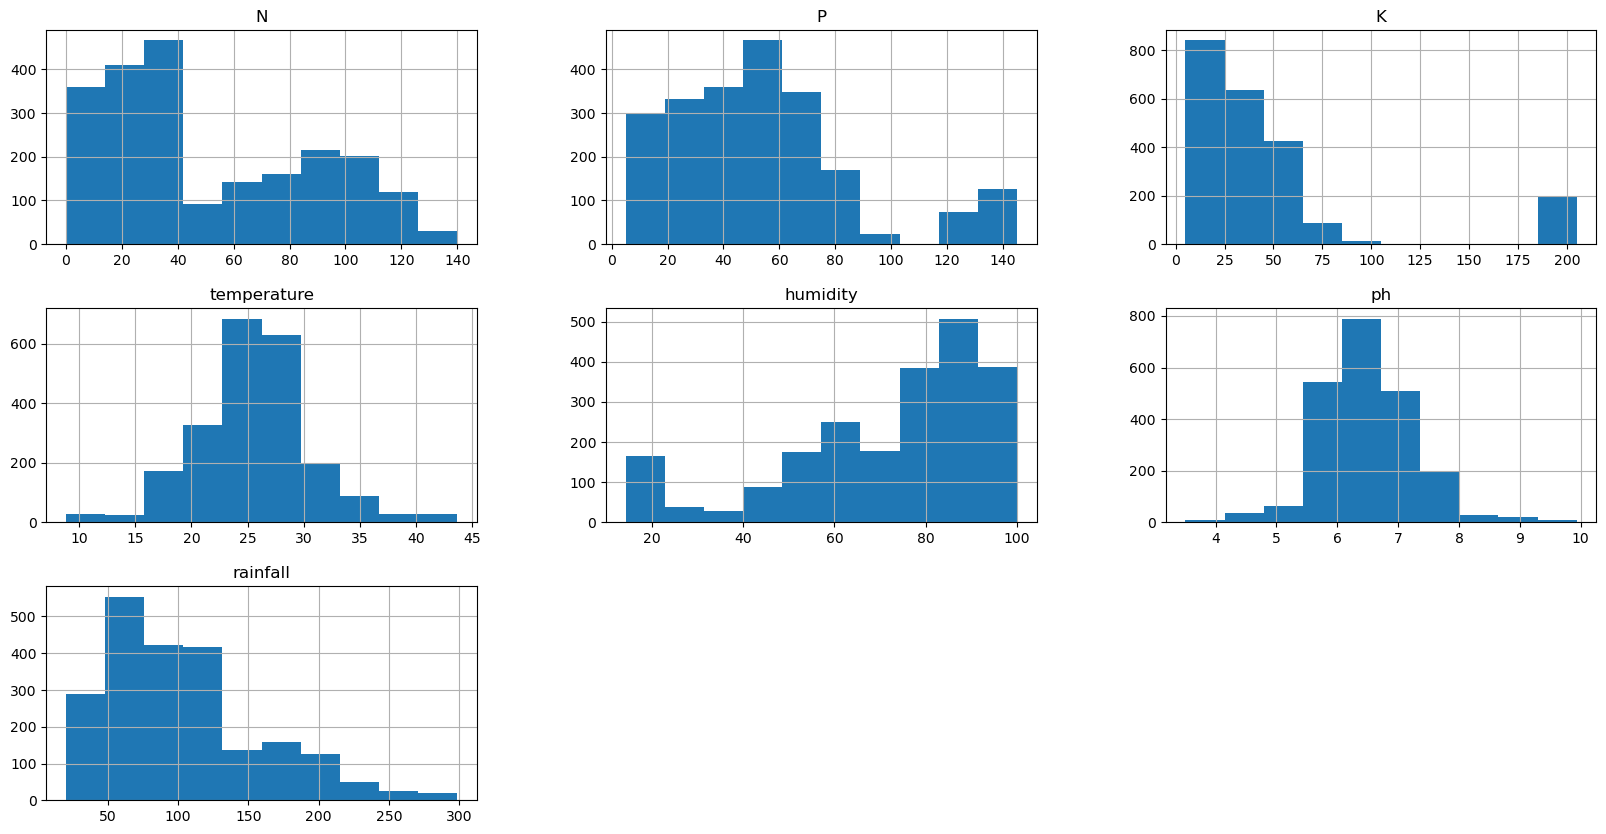

In [12]:
#visualizing the data distribution of each column
plt.rcParams['figure.figsize'] = [20,10]
data.hist()
plt.show()

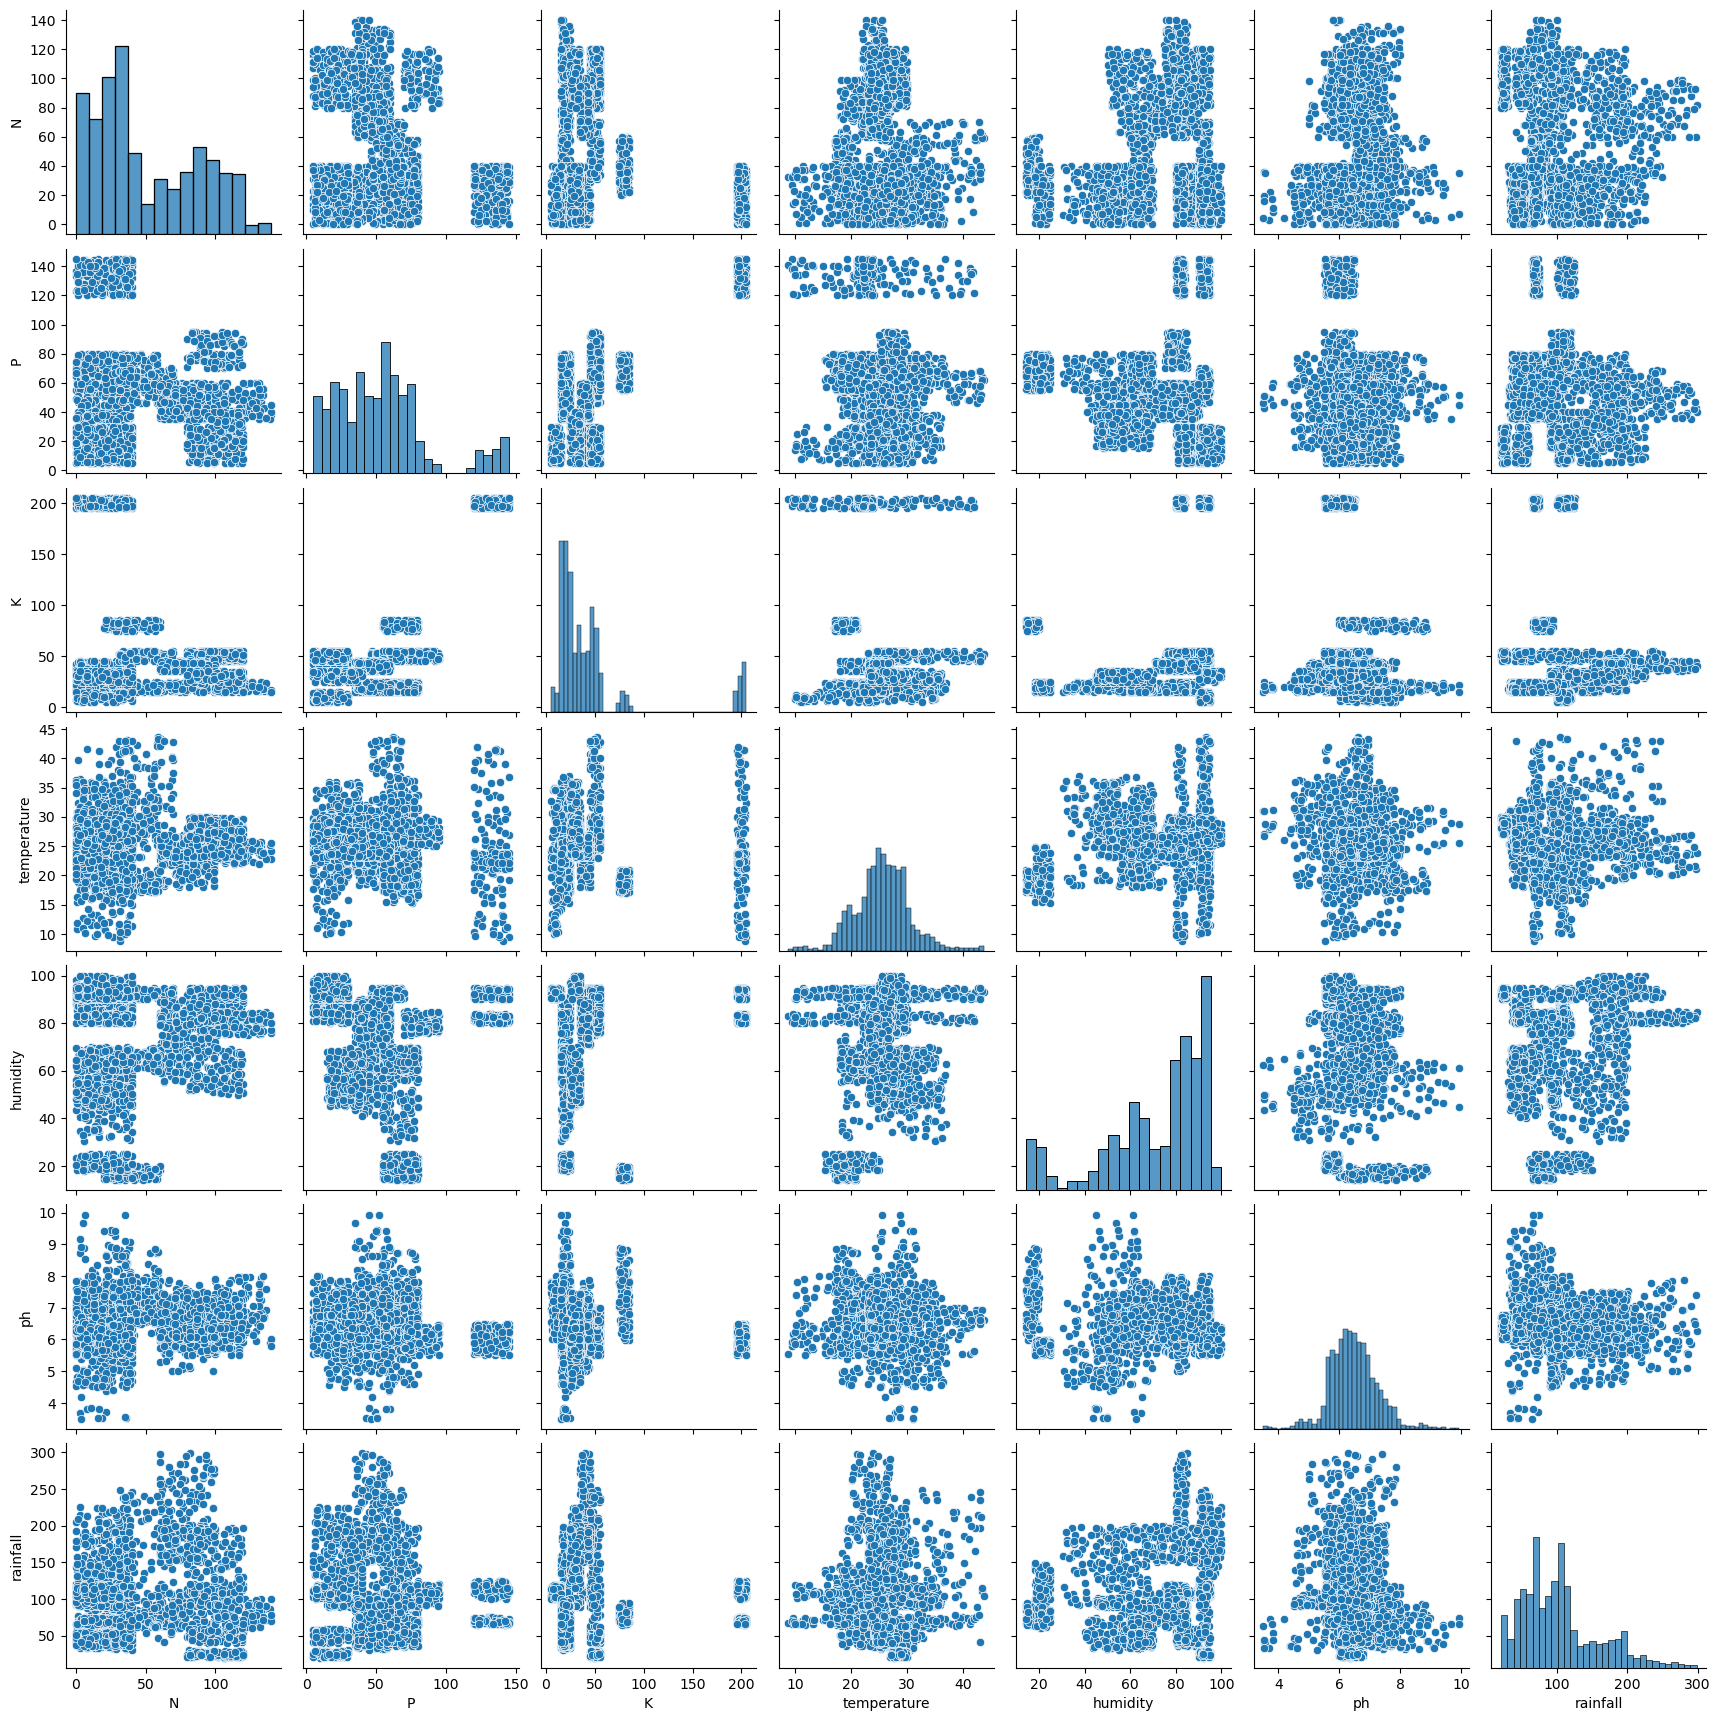

In [13]:
#visualizing the releationship between each pair of variables
sn.pairplot(data)

In [15]:
features=data.columns.to_list()
features.remove('label')
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

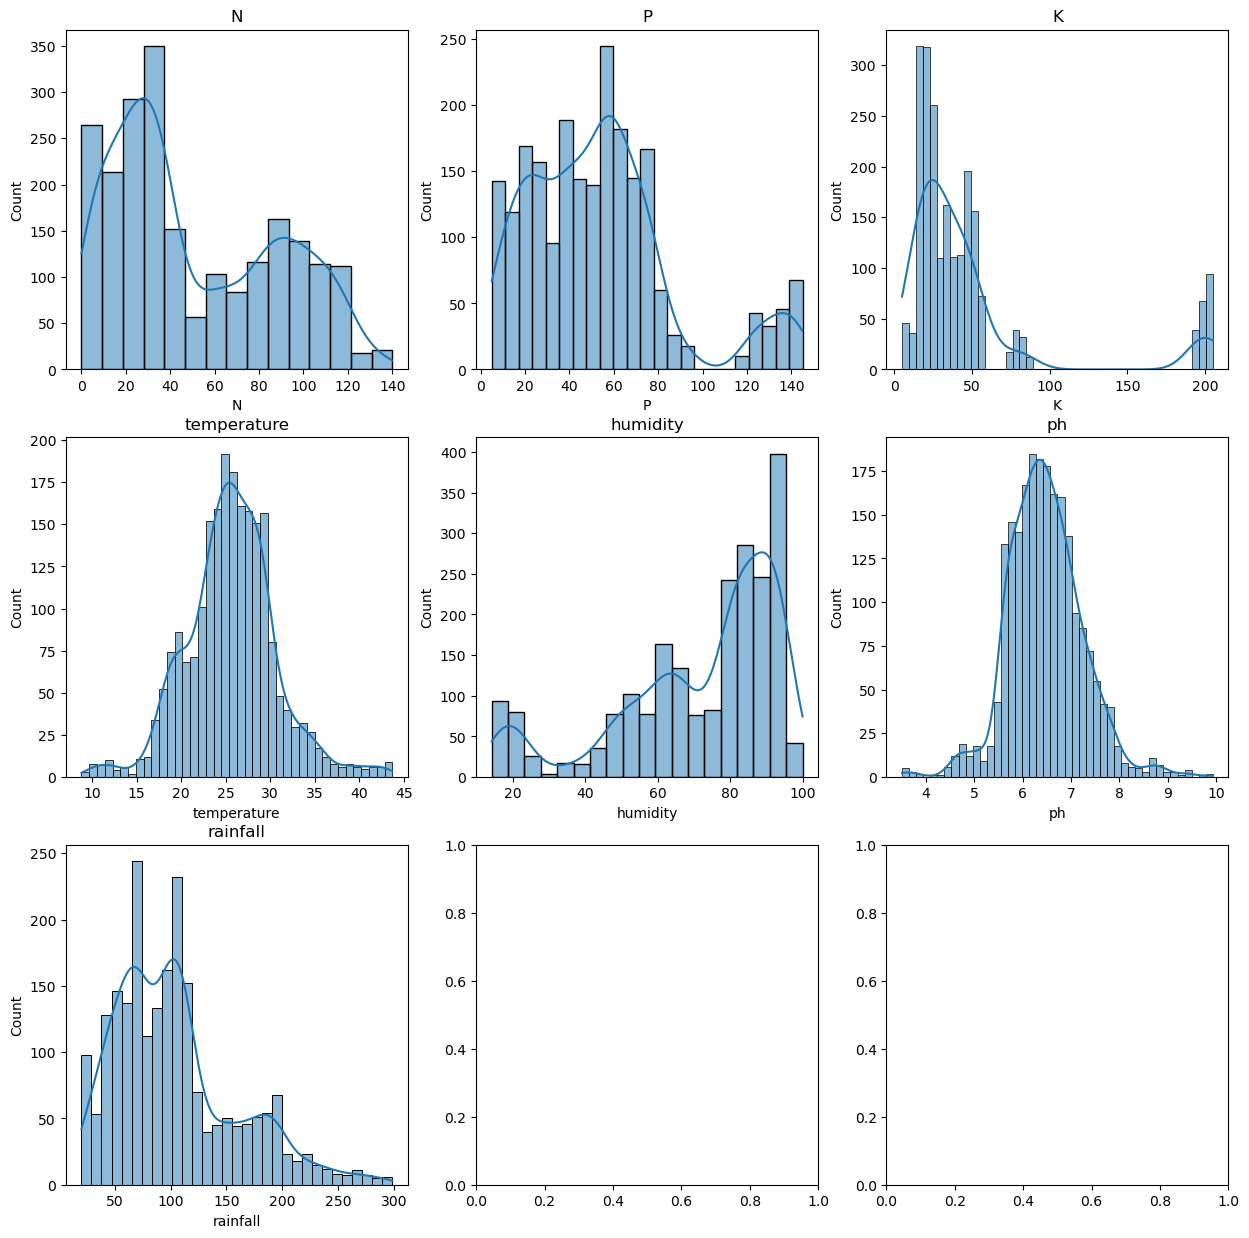

In [19]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
for feature, ax in zip(features, axes.flatten()):
    sn.histplot(data[feature], ax=ax, kde=True)  # Plot histogram with KDE
    ax.set_title(feature) 

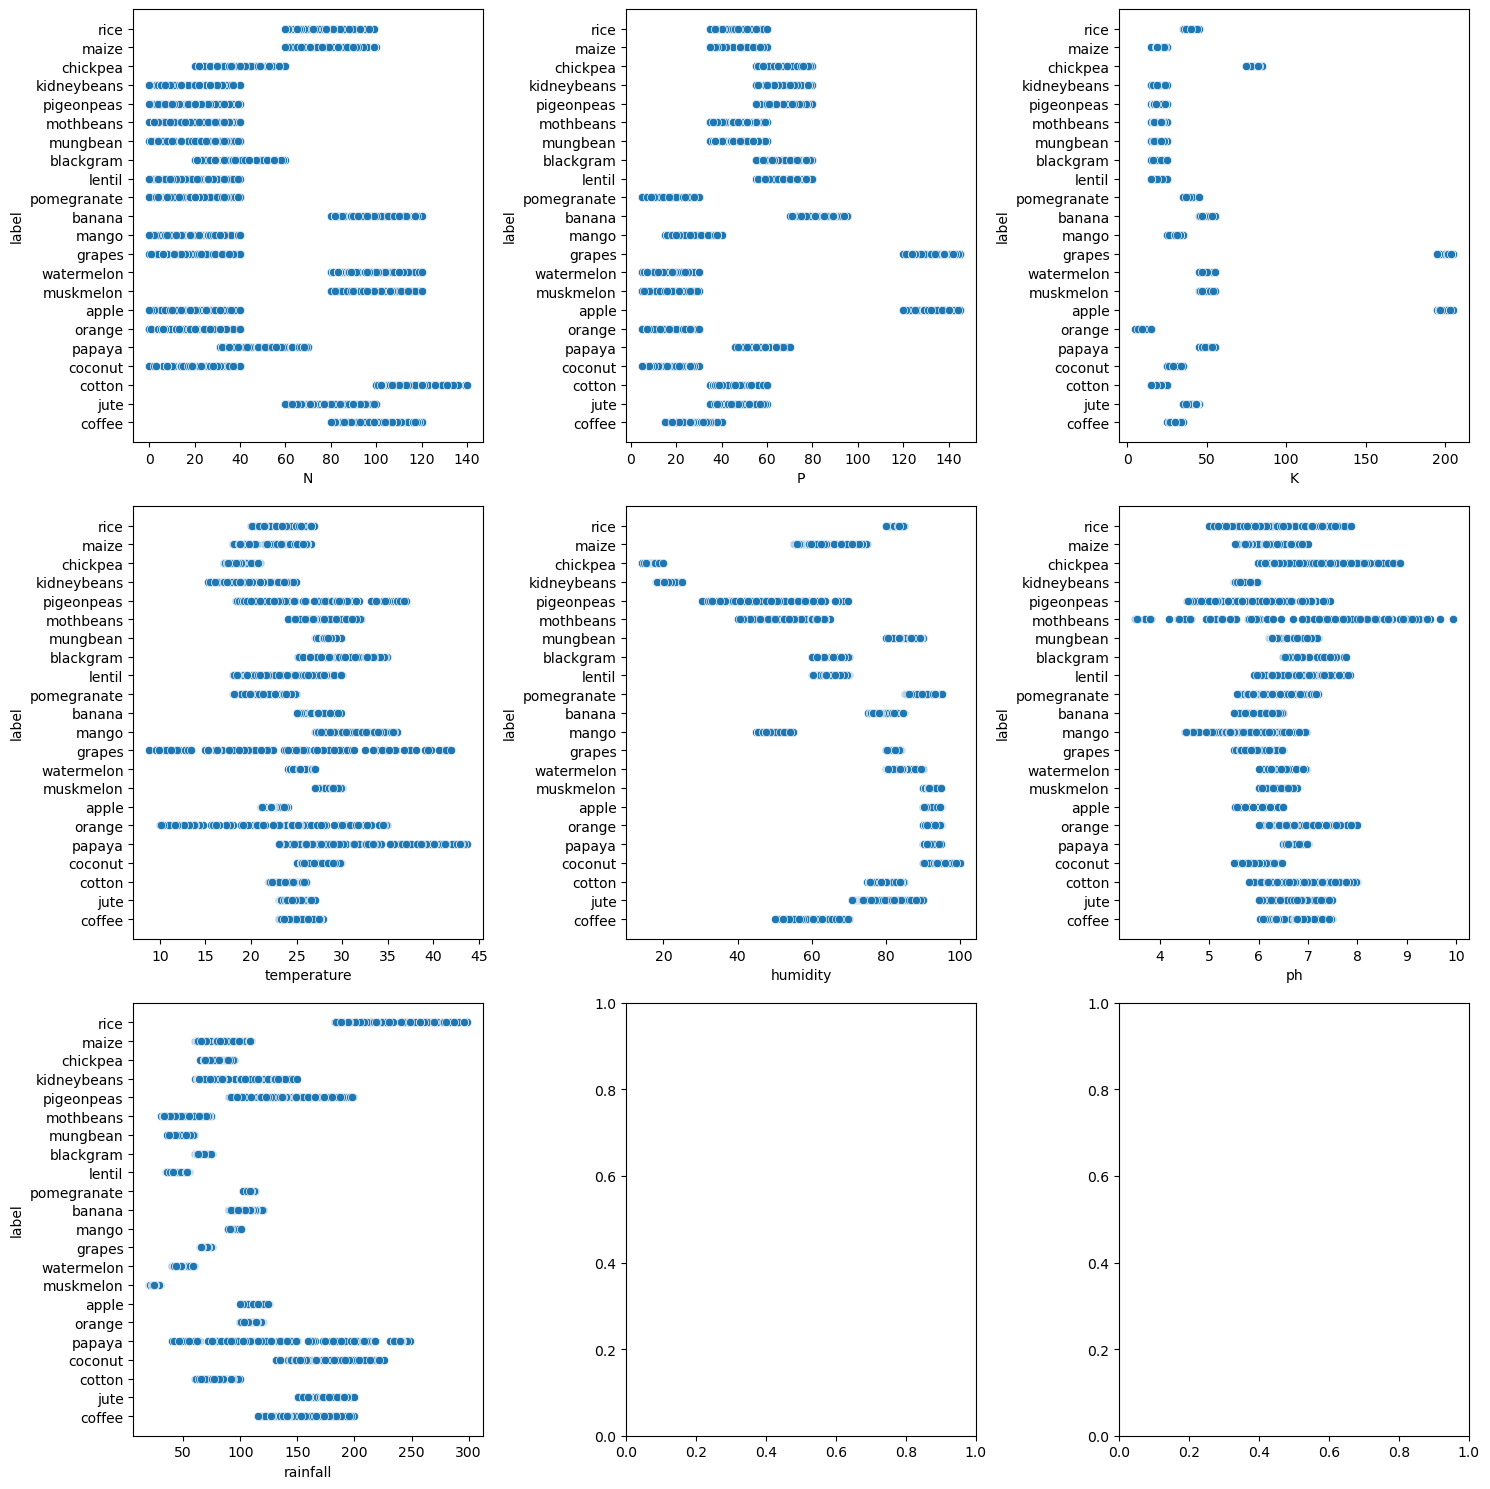

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for feature, ax in zip(features, axes.flatten()):
    sn.scatterplot(x=feature, y='label', data=data, ax=ax)

plt.tight_layout() 
plt.show() 

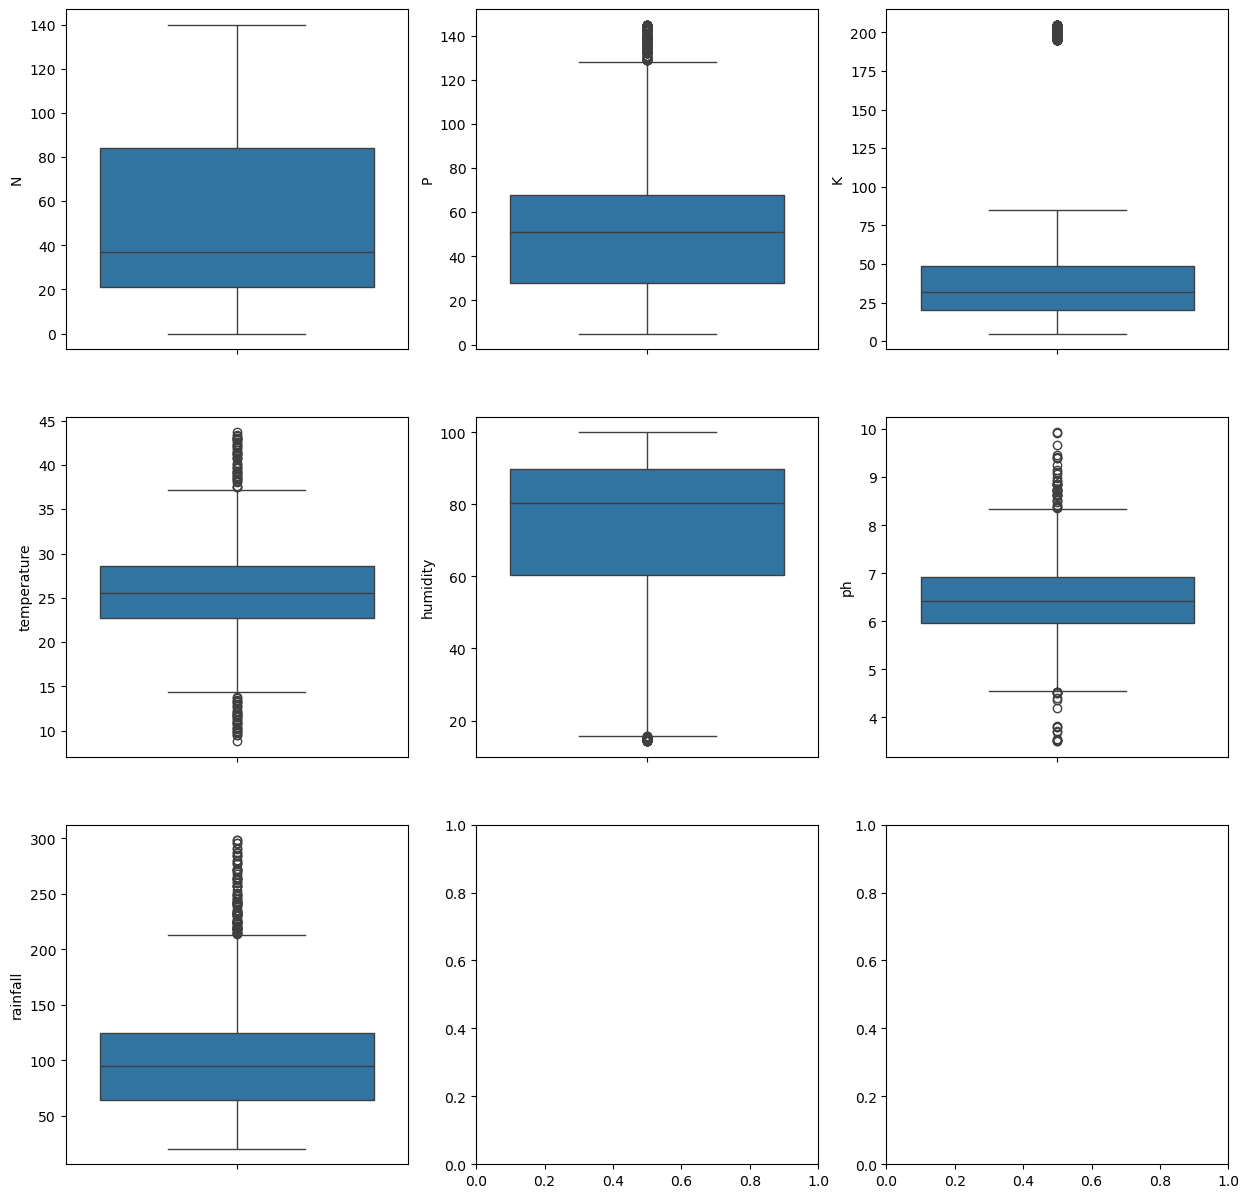

In [30]:
fig,axes=plt.subplots(3,3,figsize=(15,15))
for feature,ax in zip(features,axes.flatten()):
    sn.boxplot(data[feature],ax=ax)
plt.tight_layout
plt.show()

In [31]:
num_cols = data.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [33]:
num_cols.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

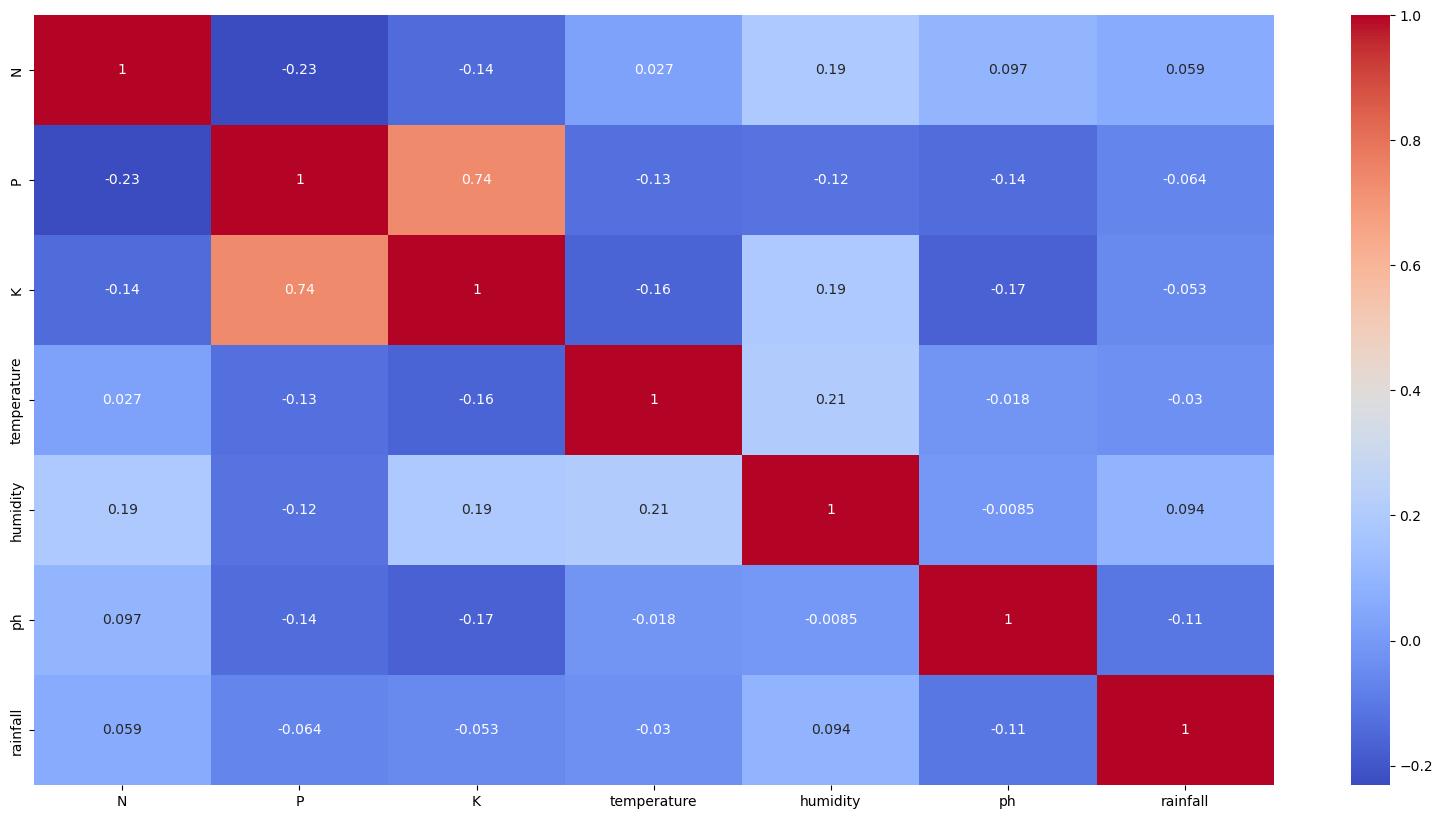

In [36]:
sn.heatmap(num_cols.corr(),annot=True,cmap='coolwarm')

In [37]:
data['label'].nunique()

22

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['encoded_label']=encoder.fit_transform(data['label'])

In [46]:
data.drop('label',axis=1,inplace=True)

In [47]:
data

,N,P,K,temperature,humidity,ph,rainfall,encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [52]:
data['encoded_label'].value_counts()

encoded_label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64